## Extracting Text from different file sources.
code
#VSC-9d978e58
python
# Install required packages. Restart kernel after installation
%pip install git+https://github.com/google/generative-ai-python.git opencv-python pillow
language
source
OCR (Optical Character Recognition)

In [1]:
pip install pytesseract opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [3]:
# lets Load and Process the image
image = cv2.imread('Capture1.PNG') # Load the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # To convert BGR to Grey
_,image_bw = cv2.threshold(image_grey,120,255,cv2.THRESH_BINARY) # To convert Grey to Black and White

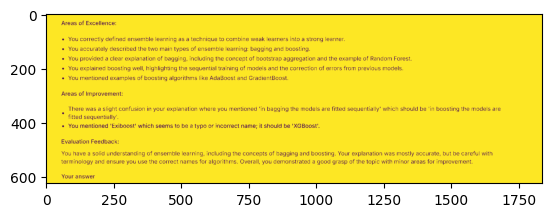

In [4]:
plt.imshow(image_bw)

In [5]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [6]:
cv2.imshow('Grey Image', image_bw)

In [ ]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\BENTO\AppData\Local\Programs\Tesseract-OCR\tesseract.exe' # Path where Tesseract is installed

In [10]:
print(pytesseract.image_to_string(image_bw))

Areas of Excellence:

« You correctly defined ensemble learning as a technique to combine weak learners into a strong learner.

« You accurately described the two main types of ensemble learning: bagging and boosting.

« You provided a clear explanation of bagging, including the concept of bootstrap aggregation and the example of Random Forest.
« You explained boosting well, highlighting the sequential training of models and the correction of errors from previous models.

« You mentioned examples of boosting algorithms like AdaBoost and GradientBoost.

Areas of Improvement:

There was a slight confusion in your explanation where you mentioned ‘in bagging the models are fitted sequentially’ which should be ‘in boosting the models are
.
fitted sequentially’.
« You mentioned 'Exiboost' which seems to be a typo or incorrect name; it should be 'XGBoost’.
Evaluation Feedback:
You have a solid understanding of ensemble learning, including the concepts of bagging and boosting. Your explanation

Note:

* tesseract is working fine when we have a clear image with typed characters. But as we are giving any image of handwritten notes the text that is extracting is not good enough.

* Lets try another approach and use LLM model as OCR, we will compare the results and see.

In [4]:
import google.generativeai as genai
import cv2
from PIL import Image
import os

c:\Users\BENTO\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\BENTO\AppData\Local\Temp\ipykernel_12604\3330870731.py:1: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


In [23]:
pip install python-dotenv

  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
Using cached python_dotenv-1.2.1-py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from dotenv import load_dotenv
load_dotenv()

True

In [25]:
key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=key)

In [26]:
model = genai.GenerativeModel('gemini-2.5-flash-lite')

In [27]:
prompt = '''You act as an OCR application on the given image and extract the text from it.
            Give only the text as output, do not give any other explanation or description.'''

In [28]:
# lets Load and Process the image
image = cv2.imread('notes.jpg') # Load the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # To convert BGR to Grey
_,image_bw = cv2.threshold(image_grey,150,255,cv2.THRESH_BINARY) # To convert Grey to Black and Whit

In [29]:
image

array([[[108, 106, 146],
        [ 50,  49,  81],
        [142, 144, 159],
        ...,
        [ 60,  61,  45],
        [ 71,  72,  56],
        [ 84,  85,  69]],

       [[105, 103, 143],
        [ 46,  45,  77],
        [138, 140, 155],
        ...,
        [ 98,  99,  83],
        [ 99, 100,  84],
        [105, 106,  90]],

       [[104, 102, 142],
        [ 46,  45,  77],
        [137, 139, 154],
        ...,
        [ 94,  95,  79],
        [ 90,  91,  75],
        [ 92,  93,  77]],

       ...,

       [[ 96,  96,  94],
        [ 96,  96,  94],
        [ 96,  96,  94],
        ...,
        [  1,   1,   1],
        [  3,   3,   5],
        [  2,   2,   4]],

       [[ 95,  95,  93],
        [ 96,  96,  94],
        [ 96,  96,  94],
        ...,
        [  1,   1,   1],
        [  3,   3,   5],
        [  2,   2,   4]],

       [[ 95,  95,  93],
        [ 95,  95,  93],
        [ 96,  96,  94],
        ...,
        [  1,   1,   1],
        [  3,   3,   5],
        [  2,   2,   4]]

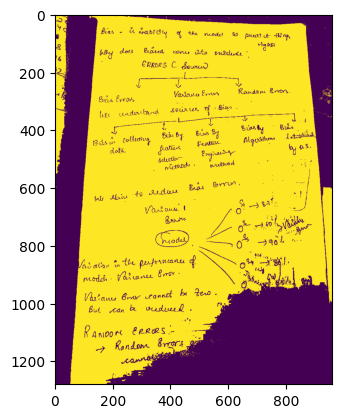

In [30]:
plt.imshow(image_bw)

In [32]:
print(pytesseract.image_to_string(image_bw))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [33]:
# The image that CV2 gives is in numpy array format, we need to convert it to image object
final_image = Image.fromarray(image_bw) 

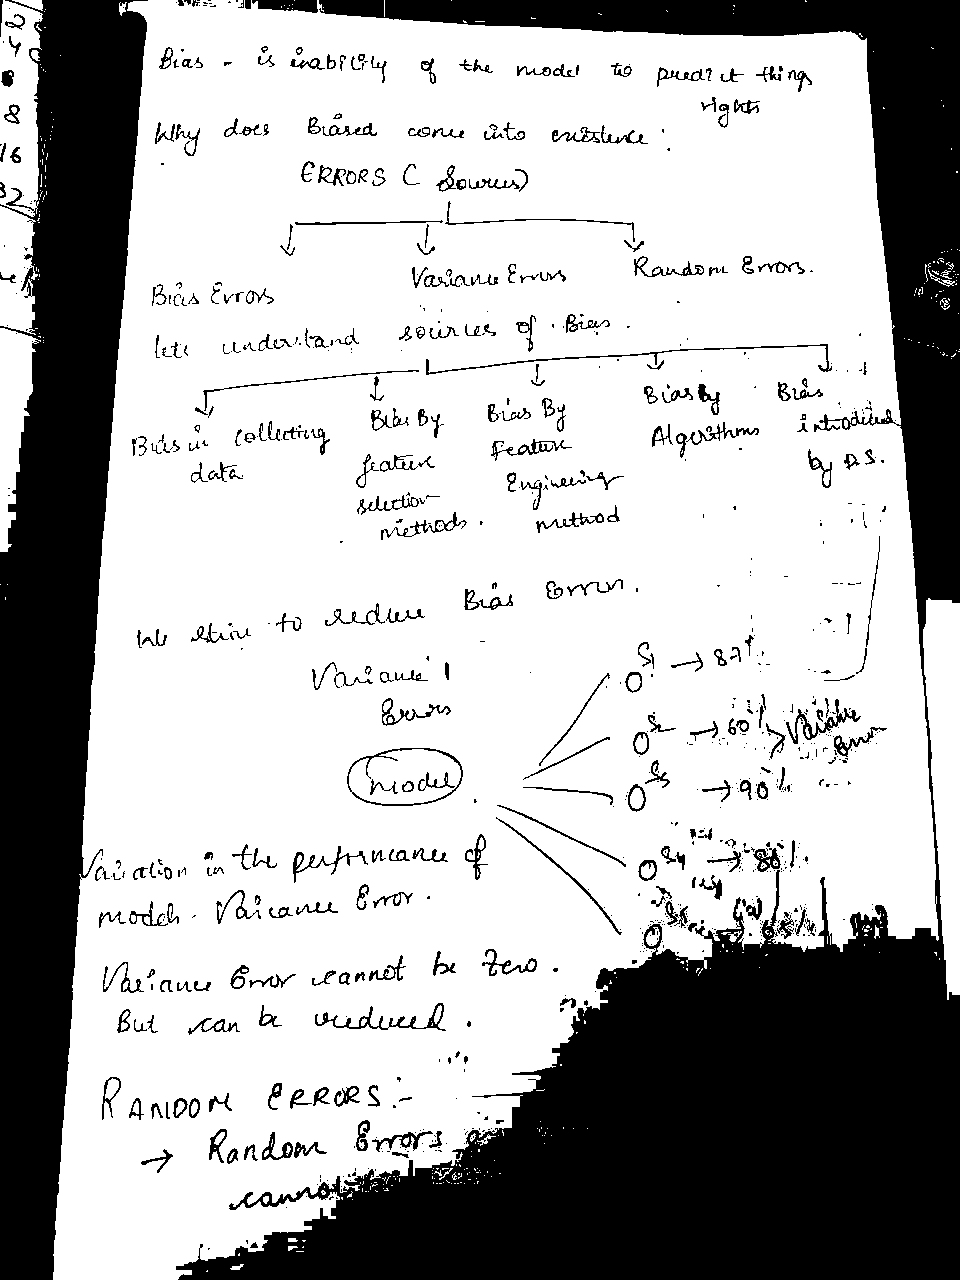

In [34]:
final_image

In [35]:
response = model.generate_content([prompt,final_image])
output_text = response.text
print(output_text)

Bias - is inability of the model to predict things
Why does Biased come into existence?
RIGHTS
ERRORS ( Sources)
Bias Errors
Variance Errors
Random Errors.
lets understand sources of Bias.
Bias in collecting
data
Bias By
feature
selection
methods
Bias By
feature
Engineering
method
Bias By
Algorithms
Bias
introduced
by AS.
we strive to reduce Bias Error.
Variance Errors
Model
Variation in the performance of
model. Variance Error.
Variance Error cannot be zero.
But can be reduced.
RANDOM ERRORS:-
→ Random Errors
cannot


Note:

OCR Based on LLM model seems to be a better option to extrcat text even from handwritten notes. It may not be able to extrcat 100% but still its giving better output than tesseract.

## Extract Text from DOCX (Word Document)

In [36]:
pip install python-docx

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------------------ --------------------- 1.8/4.0 MB 8.5 MB/s eta 0:00:01
   ------------------------------- -------- 3.1/4.0 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------  3.9/4.0 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 5.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------

In [37]:
from docx import Document

In [38]:
# Lets read the docx file
file = Document('stats.docx')

In [39]:
text_extacted = ' '.join([p.text for p in file.paragraphs])

In [40]:
print(text_extacted)

STATISTICS   Descriptive Statistics 1. What is the difference between population and sample? Population refers to the entire group being studied, while a sample is a subset of the population used for analysis. 2. What are mean, median, and mode? Mean: The average of all values. Median: The middle value when arranged in order. Mode: The most frequently occurring value. 3. What is the difference between variance and standard deviation? Variance measures how far data points are from the mean, squared. Standard deviation is the square root of variance, making it more interpretable in the same units as the data. 4. What are skewness and kurtosis? Skewness: Measures the asymmetry of the data distribution. Positive skew → right tail is longer. Negative skew → left tail is longer. Kurtosis: Measures the "tailedness" of the distribution. High kurtosis → more outliers (leptokurtic). Low kurtosis → fewer outliers (platykurtic). 5. What is the difference between a parameter and a statistic? Parame

In [ ]:
pip install google-generativeai opencv-python pillow

Note: you may need to restart the kernel to use updated packages.
